<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF OPE - 2019</span></p>
<p><font size="4">  UE Machine Learning and advanced processing methods for multi-sensor data  </font></p>
<p></p>
<p><font size="5">  Notebook 02: Python lab - Optimization </font></p>
</p></br>
</p>
</CENTER>

# <span style="color:#00B8DE"> 1. Unconstrained optimization</span>
Let consider function $f(x) = \frac{1}{2} x^\top A x + x^\top b$ where $A = [1,0; 0,4]$ and $b = [1,1]$

In [2]:
import numpy as np
from matplotlib import pyplot as plt

#### Question 1: Define this function ant its gradient 

In [3]:
"""
define the cost function 
f(A,b,x) = 0.5 * x' A x + x'b
"""

def f(A, b, x):
    return (0.5 * x.T@A@x + x.T@b)

"""
define the gradient function 
df(A,b,x) = Ax + b 
""" 

def df(A,b,x):
    return(A@x + b )


#### Question 2: Visualize this function on the square with vertices (±5,±5) (use confour function from matplotlib)

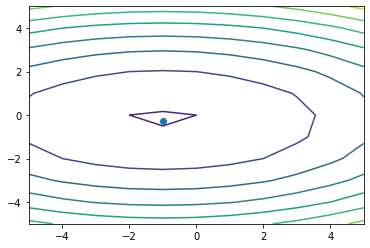

In [36]:
#  Contour plots (sometimes called Level Plots) are a way to show a three-dimensional surface on a two-dimensional 
# plane. It graphs two predictor variables X Y on the y-axis and a response variable Z as contours.  
# These contours are sometimes called the z-slices or the iso-response values.
# A contour plot is appropriate if you want to see how value Z changes as a function of two inputs X and Y, 
# such that Z = f(X,Y). A contour line or isoline of a function of two variables is a curve along which 
# the function has a constant value.The independent variables x and y are usually restricted 
# to a regular grid called meshgrid. The numpy.meshgrid creates a rectangular grid out of an array of x 
# values and an array of y values.

n = 100

A = np.array([[1,0],[0,4]])
b =  np.array([1,1])
x = np.arange(-5, 6, 1)

X, Y = np.meshgrid(x,x)

n=len(X)
Z=np.zeros((n,n))

for i in range(n):
    for j in range(n):
        Z[i][j]= f(A,b,np.array([X[i][j],Y[i][j]]))


opt = -np.dot(np.linalg.inv(A), b) # optimal point


plt.figure()
plt.contour(X,Y,Z)
plt.scatter(opt[0], opt[1])

## <span style="color:#00B8DE"> 1.1 Gradient algorithm </span>
> #### Input:  Set $\text{maxIter} = 10^4, \text{stop} = 1e-5, x_0, \gamma_k$ 
> #### Iterations: 
>> $\text{For } k = 0, 1, \ldots, \text{maxIter}$ <br> 
>>> $x_{k+1} = x_k - \gamma_k \nabla f(x_k)$  <br> 
>>> $\text{If } \|x_{k+1} - x_k\| < \text{stop}$
>>>> nbIter = $k$ <br>
>>>> break
> #### Output: $ \hat{x} = x_{k+1}$

#### Question 3: Implement gradient algorithm to minimize $f(x)$ and show the results

In [5]:
# Gradient algorithm 

def gradient_algo(f, df, A, b, init = np.array([0,0]) , stop_crit =1.e-5, max_iter = 10e4, xopt=opt, gamma = .01):
# Constant stepsize
    x         = init
    nbLoops   = 0 # number of loops
    results = x  # collect the result at each iteration into results
    
    for k in range(int(max_iter)):
        x = x - gamma*df(A,b,x)
        results =np.row_stack((results,x))
        if np.linalg.norm(x-results[k]) < stop_crit:
            nbLoops = k+1
            break

    return results, nbLoops


# Test algorithm
resu_grad, nbLoops_grad = gradient_algo(f, df, A, b)
resu_grad

array([[ 0.        ,  0.        ],
       [-0.01      , -0.01      ],
       [-0.0199    , -0.0196    ],
       ...,
       [-0.99899682, -0.25      ],
       [-0.99900685, -0.25      ],
       [-0.99901678, -0.25      ]])

Number of iterations with constant stepsize: 689


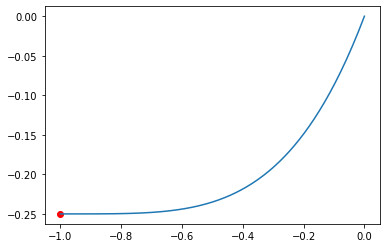

In [6]:
# plot results
print('Number of iterations with constant stepsize: ' + str(nbLoops_grad))
plt.figure()

plt.scatter(opt[0], opt[1], facecolor='red')
plt.plot(resu_grad[:,0],resu_grad[:,1])

## <span style="color:#00B8DE"> 1.2. Backtracking</span>
> #### Input:  Set $0<\alpha<1/2,\,0 <\beta<1,$ and $\gamma =1$
> #### Iterations:
>> While  $f(x +\gamma d) > f(x) + \alpha \gamma \nabla f(x)^\top d$
>>> $\gamma = \beta \gamma$  
> #### Output: $ \gamma$

#### Question 5: Implement Backtracking algorithm  

In [167]:
# Backtracking
#-------------
def backtracking(x, f, df, d, A, b):
    """
    bactracking: 
    see e.g. https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf - p.464
    IN:
    ---
    x: initial point
    f, df: function to be minimized and its gradient
    d: searc direction
    OUT:
    ----
    t: coefficient of the good direction
    n: number of loops
    """
    t=1
    np.random.seed(10)
    #alpha=0.25
    #beta=0.7
    alpha=np.random.uniform(0,0.5)
    beta=np.random.uniform(0,1)
    n=1
    while ( f(A,b,(x + t*d))> f(A,b,x)+alpha*t*(df(A,b,x).T)@d):
        t=beta * t # Implique que le beta ne doit pas etre trop petit
        n+=1
    return t, n


#### Question 6: Implement Gradient algorithm with backtracking to minimize $f(x)$ and compare results to gradient algorithm without backtracking.

In [168]:
# gradient descent with backtracking

def gradient_algo2(f, df, A, b, init = np.array([0,0]) , stop_crit =1.e-5, max_iter = 10e4, xopt=opt, gamma = .01):
# Constant stepsize
    x         = init
    nbLoops   = 0 # number of loops
    nbLoops_inter = 0 # number of inner loops count for backtracking
    results = x  # cellect the result at each iteration into results
        
    for k in range(int(max_iter)):
        delta_x = -df(A,b,x)
        t,nbLoops_inter = backtracking(x, f, df, delta_x, A, b)
        x = x + t * delta_x
        results =np.row_stack((results,x))
        if np.linalg.norm(x-results[k]) < stop_crit:
            nbLoops = k+1
            break
    
    
    return results, nbLoops, nbLoops_inter


# Test algorithm
resu_grad2, nbLoops_grad2, nbLoops_inter_grad2 = gradient_algo2(f, df, A, b)
resu_grad2

array([[ 0.        ,  0.        ],
       [-0.02075195, -0.02075195],
       [-0.04107326, -0.03978133],
       [-0.06097285, -0.05723111],
       [-0.0804595 , -0.07323243],
       [-0.09954176, -0.08790552],
       [-0.11822802, -0.10136063],
       [-0.13652651, -0.11369885],
       [-0.15444527, -0.12501291],
       [-0.17199217, -0.13538781],
       [-0.18917495, -0.14490152],
       [-0.20600115, -0.15362551],
       [-0.22247818, -0.16162535],
       [-0.23861327, -0.16896113],
       [-0.25441353, -0.17568799],
       [-0.2698859 , -0.18185647],
       [-0.28503719, -0.18751291],
       [-0.29987406, -0.19269983],
       [-0.31440304, -0.19745619],
       [-0.32863051, -0.20181773],
       [-1.        , -0.3945468 ],
       [-1.        , -0.38254829],
       [-1.        , -0.37154575],
       [-1.        , -0.3614565 ],
       [-1.        , -0.35220474],
       [-1.        , -0.34372095],
       [-1.        , -0.33594138],
       [-1.        , -0.32880758],
       [-1.        ,

Number of inner loops for backtracking: 2
Number of iterations for backtracking: 103


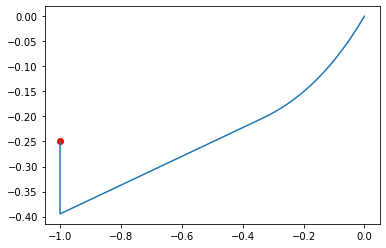

In [169]:
print('Number of inner loops for backtracking: ' + str(nbLoops_inter_grad2))
print('Number of iterations for backtracking: ' + str(nbLoops_grad2))

plt.figure()

plt.scatter(opt[0], opt[1], facecolor='red')
plt.plot(resu_grad2[:,0],resu_grad2[:,1])
# Le nombre d'itérations est beaucoup plus faible quand on combine le bactracking et la descente de gradient que lorsque l'on utilise uniquement la descente de gradient.

## <span style="color:#00B8DE"> 1.3. Newton algorithm</span>
> #### Input:  Set $\text{maxIter} = 10^4, \text{stop} = 1e-5, x_0, \gamma_k$
> #### Iterations:
>> $ \text{For } k = 1, 2, \ldots, \text{maxIter}$
>>> $x_{k+1} = x_k - \gamma_k [\nabla^2 f(x_k)]^{-1} \nabla f(x_k)$  <br> 
>>>$ \text{If }\|x_{k+1} - x_k\| < \text{stop}$
>>>> nbIter = $i$ <br>
>>>> break
> #### Output: $ \hat{x} = x_{k+1}$

#### Question 7: Implement Newton algorithm with backtracking to minimize $f(x)$ and compare results to gradient algorithm with backtracking.

In [127]:
def d2f(A,b,x):
    return (A)

def newton_algo(f, df, d2f, A, b, init = np.array([0,0]) , stop_crit =1.e-5, max_iter = 10e4, xopt=opt):
     
    x = init
    nbLoops   = 0 # number of loops
    nbLoops_inter = 0 # number of inner loops count for backtracking
    results = x  # cellect the result at each iteration into results

    for k in range(1,int(max_iter)):
        delta_x = -df(A,b,x)
        t,nbLoops_inter = backtracking(x, f, df, delta_x, A, b)
        x = x + t * np.linalg.inv(d2f(A,b,x))@delta_x
        results =np.row_stack((results,x))
        if np.linalg.norm(x-results[k-1]) < stop_crit:
            nbLoops = k
            break        
   
    
    return results, nbLoops, nbLoops_inter

# test algo 

resu_newton, nbLoops_newton, nbLoops_inter_newton  = newton_algo(f, df, d2f, A,b)

Newton: Number of inner loops for backtracking: 2
Newton: Number of iterations for backtracking: 20


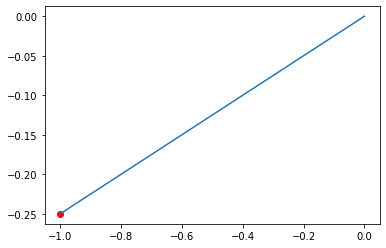

In [128]:
print('Newton: Number of inner loops for backtracking: ' + str(nbLoops_inter_newton))
print('Newton: Number of iterations for backtracking: ' + str(nbLoops_newton))

plt.figure()

plt.scatter(opt[0], opt[1], facecolor='red')
plt.plot(resu_newton[:,0],resu_newton[:,1])

# <span style="color:#00B8DE"> 2. Constrained optimization</span>
Let consider function $f(x) = \frac{1}{2} x^\top A x + x^\top b$ where $A = [1,0; 0,4]$ and $b = [1,1]$. 


## <span style="color:#00B8DE"> 2.1 Newton algorithm with equality constraints</span>
### To solve the problem: $\min_{x} \; f(x)$ s.t. $Dx = e$
> #### Input:  Set $\text{maxIter} = 10^4, \text{stop} = 1e-5, x_0 $ s.t. $Dx_0 =e$ 
> #### Iterations:
>> $\text{For } k = 1, 2, \ldots, \text{maxIter}$
>>> #### Find $h$ and $\rho$ s.t. <br>
>>>> $\begin{bmatrix}\nabla^2 f(x_k) & D^\top \\ D& 0 \end{bmatrix} \times \begin{bmatrix}h\\ \lambda \end{bmatrix} =  \begin{bmatrix} -\nabla f(x_k) \\ e - Dx_k\end{bmatrix}$<br> 
>>>> $\rho = \text{argmin}_{\rho} \; f(x_k +\rho h)$ <br>
>>> #### $x_{k+1} = x_k + \rho h$ <br>
>>> $\text{If } \|x_{k+1} - x_k\| < \text{stop}$
>>>> nbIter = $i$ <br>
>>>> break
> #### Output: $ \hat{x} = x_{k+1}$

#### Question 8: Implement Newton algorithm to solve the following problem:  $\text{minimize}_{x\in \mathbb{R}^2}\;f(x)$  such that  $ Dx = e$ with $D = [1,-2]$ and $e = 0$. 

In [129]:
# Newton algo for optimization with equality constraints

def Newton_algo2(f, df, d2f, A, b, D,e, init = np.array([0.5, 0.3]), stop_crit = 1e-7, maxIter = int(10e5)  ):
        
    x = init
    
    nbLoops   = 0 # number of loops
    nbLoops_inter = 0 # number of inner loops count for backtracking
    results = x  # cellect the result at each iteration into results
    
    for k in range(1,int(maxIter)):
        #delta_x = -df(A,b,x)
        #t,nbLoops_inter = backtracking(x, f, df, delta_x, A, b)
        
        zeros=np.zeros((1,len(D)))
        
        inter=np.column_stack((d2f(A,b,x), D.T))
        inter=np.row_stack((inter,np.insert(D, len(D), 0)))
        inter_result=np.insert(-df(A,b,x),len(df(A,b,x)),(e-(D.T)@x))

        inv = np.linalg.inv(inter)
        inconnu=np.linalg.inv(inter)@inter_result
        #inconnu=np.linalg.solve(inter,inter_result)
        h=inconnu[:len(x)]
        
        rho,nbLoops_inter=backtracking(x, f, df, h, A, b)
        
        x = x + rho * h
        results =np.row_stack((results,x))
        if np.linalg.norm(x-results[k-1]) < stop_crit:
            nbLoops = k
            break
    
    
     
        
    return results, nbLoops, nbLoops_inter

# test algo
D=np.array([1,-2])
e=0
resu_newton2, nbLoops_newton2, nbLoop_inner_newton2 = Newton_algo2(f, df, d2f, A, b, D,e)

Newton2: Number of inner loops for backtracking: 1
Newton2: Number of iterations for backtracking: 2


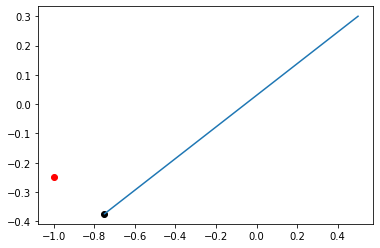

In [130]:
print('Newton2: Number of inner loops for backtracking: ' + str(nbLoop_inner_newton2))
print('Newton2: Number of iterations for backtracking: ' + str(nbLoops_newton2))


plt.figure()
 
plt.scatter(opt[0], opt[1], facecolor='red')
plt.scatter(resu_newton2[-1,0], resu_newton2[-1,1], facecolor='black')
plt.plot(resu_newton2[:,0],resu_newton2[:,1])

## <span style="color:#00B8DE"> 2.2 Log-barrier algorithm</span>
### To solve the problem: $\min_{x\in \mathbb{R}^n} \; f(x)$ s.t. $Dx = e$ with $D\in R^{m\times n}, e\in R^m$,  and $g_i(x)\leq 0,\;\forall i = 1,\cdots, p $ <br>
#### Let $\varphi(x) = -\sum_{i=1}^m\log[-g_i(x)] $ and considering the problem $\min_{x} \; F(x)$ s.t. $Dx = e$ with $F(x) = t . f(x) + \varphi(x) $ <br>
> #### Input:  Set $maxIter = 10^4, stop = 1e-5, t>0, \alpha>1$ and set $x_0$ such that
$Dx_0=e$ and $g_i(x_0) \leq 0,\;\forall i = 1,\cdots, p$.
> #### Iterations:
>> $\text{For } k = 1, 2, \ldots, \text{maxIter}$
>>> #### Find $h$ and $\rho$ s.t. <br>
>>>> $\begin{bmatrix}\nabla^2 F(x_k) & D^\top \\ D& 0 \end{bmatrix} \times \begin{bmatrix}h\\ \lambda \end{bmatrix} =  \begin{bmatrix} -\nabla F(x_k) \\ e - Dx_k\end{bmatrix}$<br> 
>>>> #### while $\exists i\in [1,\ldots,m] :\; g_i(x_k + h) >0 $  
>>>>>####            $h = 0.5  h$ 
>>>> #### $\rho = \text{argmin}_{\rho} \; F(x_k +\rho h)$ <br>
>>> #### $x_{k+1} = x_k + \rho h$  
>>> $\text{If } \frac{m}{t} < \text{stop}$
>>>> nbIter = $i$ <br>
>>>> break <br>
>>>#### $t= \alpha t$ <br>
> #### Output: $ \hat{x} = x_{k+1}$
 

#### Question 9: : Implement Log-barrier algorithm to minimize $f(x)$ such that $x \in\{x \succeq 0 : \; Dx = e\}$.

In [148]:
def F(A, b, t, x):
    return (t*f(A,b,x) - np.sum(np.log(x)))

def dF(A, b, t, x):
    return (t*df(A,b,x) - np.sum((1/x)))

def d2F(A, b , t, x):
    return (t*d2f(A,b,x) - np.sum(-(1/(x**2))))

In [156]:
# Backtracking
#-------------
def backtracking2(x,F,dF,d, A, b, t):
    """
    bactracking: 
    see e.g. https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf - p.464
    IN:
    ---
    x: initial point
    F, dF: function to be minimized and its gradient
    ...
    d: searc direction
    OUT:
    ----
    rho: good direction
    n: number of loops
    """   
    #np.random.seed(100)
    #alpha=0.25
    #beta=0.7
    rho=1
    alpha=np.random.uniform(0,0.5)
    beta=np.random.uniform(0,1)
    n=1
    while ( F(A,b,t,(x + rho*d))> F(A,b,t,x)+alpha*rho*(dF(A,b,t,x).T)@d):
        rho=beta * rho # Implique que le beta ne doit pas etre trop petit
        n+=1
     
    return rho, n


In [157]:
def Log_barrier_algo(F, dF, d2F, A, b, D, e, init = np.array([0.5, 0.3]), stop_crit = 1e-7, maxIter = int(10e5)):
    
     
    x = init 
    
    t = 2
    alpha = 1.5
    nbLoops = 0 
    nbLoops_inner = 0
    
    results = x      
    
    for k in range(1,int(maxIter)):
        m=len(D)
        
        zeros=np.zeros((1,len(D)))
        
        inter=np.column_stack((d2f(A,b,x), D.T))
        inter=np.row_stack((inter,np.insert(D, len(D), 0)))
        inter_result=np.insert(-df(A,b,x),len(df(A,b,x)),(e-(D.T)@x))

        inv = np.linalg.inv(inter)
        inconnu=np.linalg.inv(inter)@inter_result
        h=inconnu[:len(x)]
        
        
        while ((-x[0]-h[0])>0 or (-x[1]-h[1])>0 ):
            h = 0.5 * h
            
        
        rho,nbLoops_inter=backtracking2(x, F, dF, h, A, b,t)
        
        x = x + rho * h
        results =np.row_stack((results,x))
        if (m/t) < stop_crit:
            nbLoops = k
            break
            
        t=alpha*t
    
    
     
     
    return results, nbLoops, nbLoops_inner

#test algo 
 
resu_log, nbLoops_log, nbLoops_inner_log  = Log_barrier_algo(F, dF, d2F, A, b, D, e)

    

Log Barrier: Number of inner loops for backtracking: 0
Log Barrier: Number of iterations for backtracking: 41


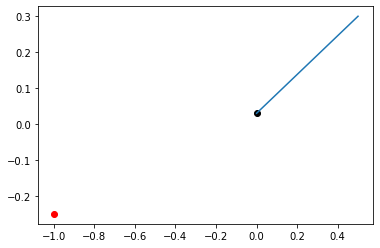

In [158]:
 
# figure

print('Log Barrier: Number of inner loops for backtracking: ' + str(nbLoops_inner_log))
print('Log Barrier: Number of iterations for backtracking: ' + str(nbLoops_log))

plt.figure()
 
plt.scatter(opt[0], opt[1], facecolor='red')
plt.scatter(resu_log[-1,0], resu_log[-1,1], facecolor='black')

plt.plot(resu_log[:,0],resu_log[:,1])

 

# <span style="color:#00B8DE"> 3. Application to solve the SVM problem (Bonus)</span>
#### Question 10: Use the Log-barrier algorithm to solve the optimization problem for SVM problem in TP1 
